In [1]:
import pandas as pd

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

app_train = pd.read_csv('../data/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('../data/home-credit-default-risk/application_test.csv')

In [2]:
app_train.shape, app_test.shape

((307511, 122), (48744, 121))

In [3]:
apps = pd.concat([app_train, app_test])
apps.shape

(356255, 122)

In [4]:
apps['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(40), object(16)
memory usage: 334.3+ MB


In [6]:
apps.dtypes

SK_ID_CURR                      int64
TARGET                        float64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
apps.dtypes.index

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [9]:
apps['CODE_GENDER'] = pd.factorize(apps['CODE_GENDER'])[0]

In [10]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(41), object(15)
memory usage: 334.3+ MB


In [11]:
object_columns = apps.dtypes[apps.dtypes == 'object'].index.tolist()

for column in object_columns:
    apps[column] = pd.factorize(apps[column])[0]

In [12]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(66), int64(56)
memory usage: 334.3 MB


In [13]:
apps.isnull().sum().head(100)

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [14]:
apps = apps.fillna(-999)
apps.isnull().sum().head(100)

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBER

In [15]:
app_train = apps[apps['TARGET'] != -999]
app_test = apps[apps['TARGET'] == -999]
app_train.shape, app_test.shape

((307511, 122), (48744, 122))

In [16]:
app_test = app_test.drop('TARGET', axis=1, inplace=False)
app_test.shape

(48744, 121)

In [17]:
ftr_app = app_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = app_train['TARGET']

In [18]:
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((215257, 120), (92254, 120))

In [19]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_jobs=-1, n_estimators=1000, learning_rate=0.02, num_leaves=32, 
                     subsample=0.8, max_depth=12, silent=-1, verbose=-1)
clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
        eval_metric='auc', verbose=100, early_stopping_rounds=50)

Training until validation scores don't improve for 50 rounds
[100]	training's auc: 0.752205	training's binary_logloss: 0.250372	valid_1's auc: 0.744317	valid_1's binary_logloss: 0.251593
[200]	training's auc: 0.771473	training's binary_logloss: 0.243554	valid_1's auc: 0.754053	valid_1's binary_logloss: 0.247539
[300]	training's auc: 0.784885	training's binary_logloss: 0.239292	valid_1's auc: 0.757737	valid_1's binary_logloss: 0.246203
[400]	training's auc: 0.796336	training's binary_logloss: 0.235948	valid_1's auc: 0.758946	valid_1's binary_logloss: 0.245732
[500]	training's auc: 0.806016	training's binary_logloss: 0.233017	valid_1's auc: 0.759411	valid_1's binary_logloss: 0.24555
Early stopping, best iteration is:
[532]	training's auc: 0.808934	training's binary_logloss: 0.232125	valid_1's auc: 0.759548	valid_1's binary_logloss: 0.245494


LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

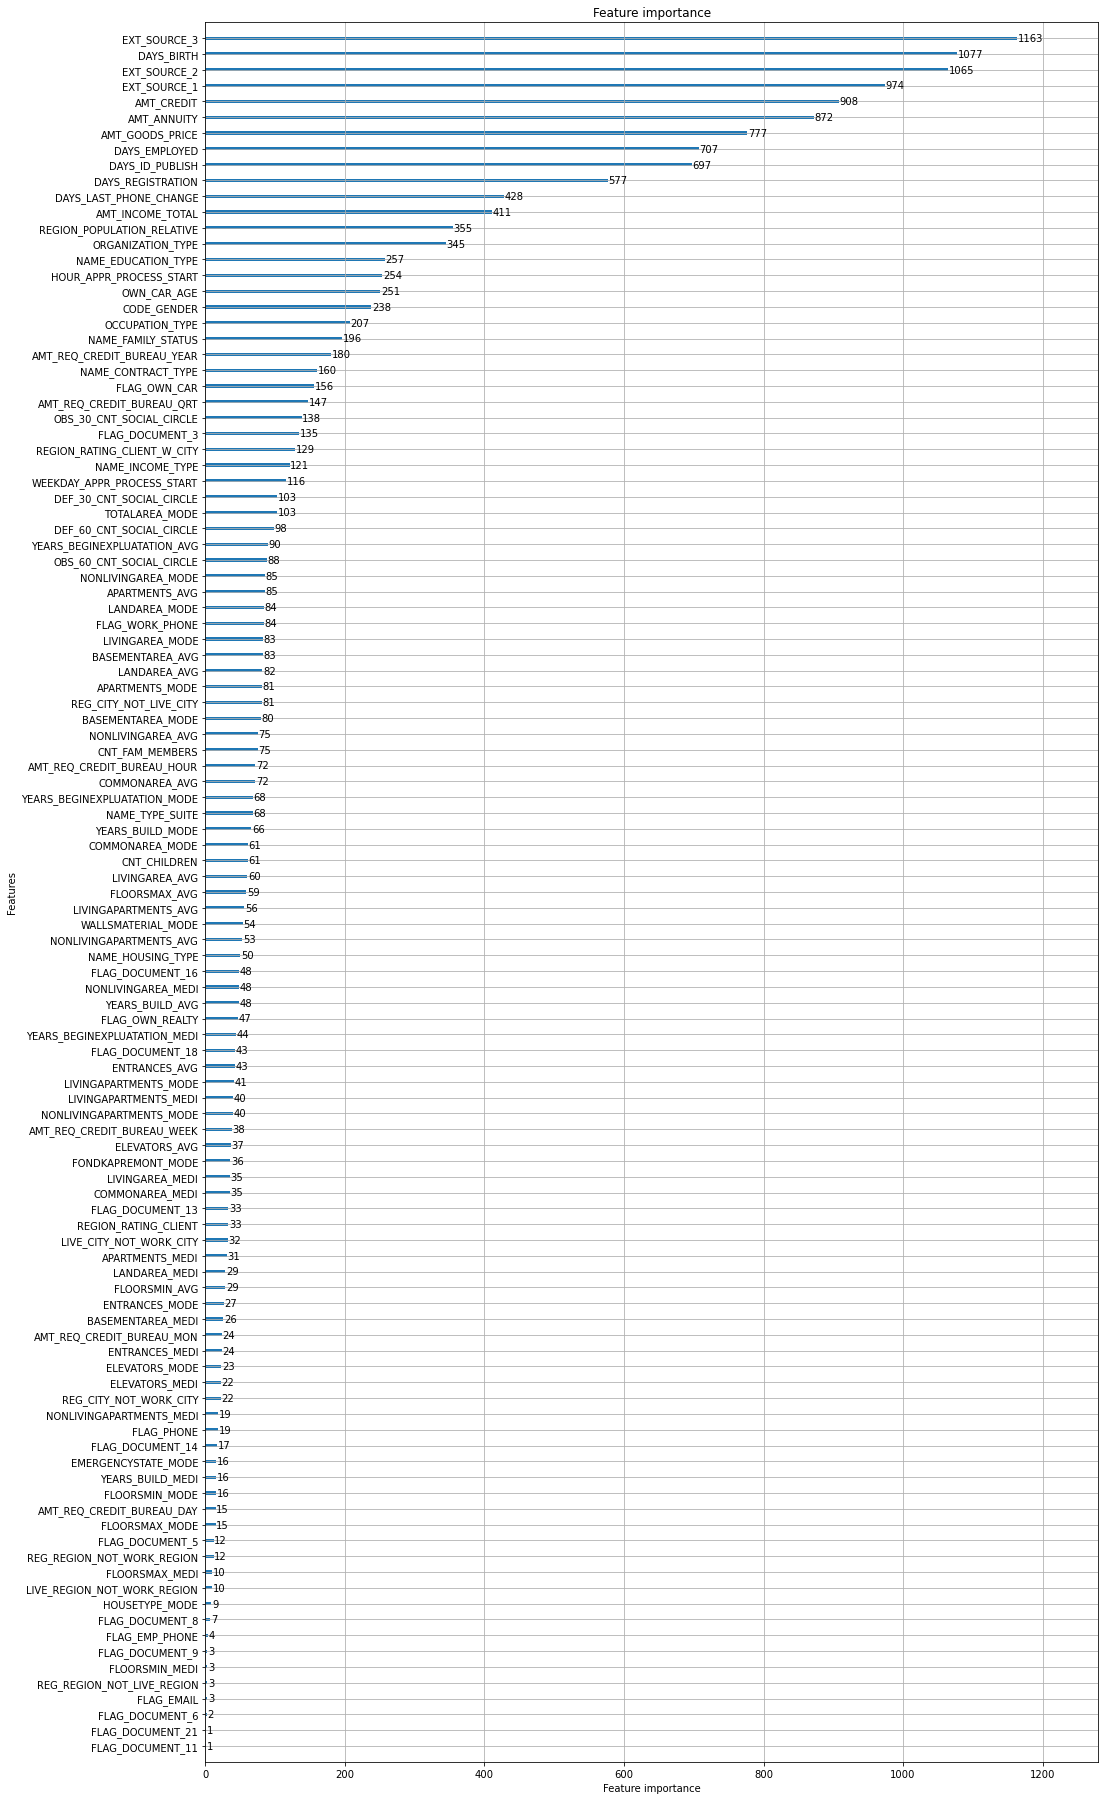

In [20]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [21]:
clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))

array([[0.97246502, 0.02753498],
       [0.87904013, 0.12095987],
       [0.98381082, 0.01618918],
       ...,
       [0.96802646, 0.03197354],
       [0.94283805, 0.05716195],
       [0.82020099, 0.17979901]])

In [22]:
preds = clf.predict_proba(app_test.drop(['SK_ID_CURR'], axis=1))[:, 1]

In [23]:
app_test['TARGET'] = preds
app_test['TARGET'].head()

0    0.027535
1    0.120960
2    0.016189
3    0.037421
4    0.146077
Name: TARGET, dtype: float64

In [24]:
app_test[['SK_ID_CURR', 'TARGET']].head()

,SK_ID_CURR,TARGET
0,100001,0.027535
1,100005,0.120960
2,100013,0.016189
3,100028,0.037421
4,100038,0.146077


In [25]:
app_test[['SK_ID_CURR', 'TARGET']].to_csv('../result/application_01_result.csv', index=False)